# Precios Cuidados 2020

### Análisis exploratorio 

Entiendo el análisis exploratorio de datos como una serie de preguntas que, al resolverlas con datos, nos brindan información que antes no teníamos.
Para este dataset, estas son algunas de las que preguntas que me surgieron y resolví con Datos :

* ¿Cuántos productos encontramos en Precios Cuidados?
* ¿Cuántos productos hay en cada categoría?
* ¿Cuales son los productos más caros?
* ¿Una vez calculado el promedio por categoría, cuál de ellas es la más cara?
* ¿Los Precios Cuidados, son iguales para todo el país?
* ¿Cuál es la región más cara de Argenina?
* ¿Cuál es la categoría dónde más diferencia de precio hay?


In [69]:
# Importamos las librerías que vamos a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [70]:
df = pd.read_csv('data/listadeprecios.csv') # Cargamos el dataset.

In [71]:
df.head() # Vemos las primeras 5 filas y todas las columnas. El dataset se cargó correctamente.

,item_name,item_category,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
0,Aceite Girasol Cada Día x 1500 cc,Almacén,"$ 121,00","$ 125,24","$ 127,66","$ 129,47","$ 130,68"
1,Aceite Girasol Cada Día x 900 cc,Almacén,"$ 75,00","$ 77,63","$ 79,13","$ 80,25","$ 81,00"
2,Aceite Girasol Florencia x 1500 cc,Almacén,"$ 121,00","$ 125,24","$ 127,66","$ 129,47","$ 130,68"
3,Aceite Girasol Florencia x 900 cc,Almacén,"$ 75,00","$ 77,63","$ 79,13","$ 80,25","$ 81,00"
4,Aceite Girasol Ideal x 1500 cc,Almacén,"$ 121,00","$ 125,24","$ 127,66","$ 129,47","$ 130,68"


In [72]:
df.shape # Vemos la forma de nuestro dataset: 309 filas y 7 columnas.

(309, 7)

In [73]:
productos_xcategoria = df['item_category'].value_counts() # Vemos la cantidad de artículos que pertenecen a cada categoria.
print(productos_xcategoria)


Almacén                      91
Lácteos                      56
Perfumería                   46
Limpieza                     40
Bebés                        19
Bebidas                      16
Bebidas con alcohol          10
Carnes y embutidos           10
Panificados                   9
Repelentes e insecticidas     7
Frutas y verduras             5
Name: item_category, dtype: int64


In [74]:
df.loc[df['item_category'] == 'Frutas y verduras'] # Vemos en detalle la categoría 'Frutas y verduras' 

,item_name,item_category,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
34,Cebolla comercial Supermercado x 1 kg,Frutas y verduras,"$ 26,00","$ 26,91","$ 27,43","$ 27,82","$ 28,08"
130,Lechuga Supermercado x 1 kg,Frutas y verduras,"$ 59,00","$ 61,07","$ 62,25","$ 63,13","$ 63,72"
146,Manzana comercial Supermercado x 1 kg,Frutas y verduras,"$ 50,00","$ 51,75","$ 52,75","$ 53,50","$ 54,00"
173,Papa comercial Supermercado x 1 kg,Frutas y verduras,"$ 26,00","$ 26,91","$ 27,43","$ 27,82","$ 28,08"
308,Zapallo anco comercial Supermercado x 1 kg,Frutas y verduras,"$ 46,00","$ 47,61","$ 48,53","$ 49,22","$ 49,68"


In [75]:
df.loc[df['item_category'] == 'Bebidas con alcohol'] # Vemos en detalle la categoría 'Bebidas con alcohol' 

,item_name,item_category,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
37,Cerveza botella retornable Quilmes Bajo Cero x...,Bebidas con alcohol,"$ 85,00","$ 85,00","$ 85,00","$ 85,00","$ 85,00"
38,Cerveza porrón retornable Quilmes Clásica x 34...,Bebidas con alcohol,"$ 35,00","$ 35,00","$ 35,00","$ 35,00","$ 35,00"
39,Cerveza rubia botella retornable Isenbeck x 1 lt,Bebidas con alcohol,"$ 90,00","$ 90,00","$ 90,00","$ 90,00","$ 90,00"
40,Cerveza rubia en lata Isenbeck x 473 cc,Bebidas con alcohol,"$ 60,00","$ 60,00","$ 60,00","$ 60,00","$ 60,00"
282,Vino Blanco Tetrabrick Arizu x 1 lt,Bebidas con alcohol,"$ 55,00","$ 56,93","$ 58,03","$ 58,85","$ 59,40"
283,Vino Blanco Tetrabrick Crespi x 1 lt,Bebidas con alcohol,"$ 55,00","$ 56,93","$ 58,03","$ 58,85","$ 59,40"
284,Vino Tinto Clásico Resero x 1125 ml,Bebidas con alcohol,"$ 75,00","$ 77,63","$ 79,13","$ 80,25","$ 81,00"
285,Vino Tinto Tetrabrick Arizu x 1 lt,Bebidas con alcohol,"$ 55,00","$ 56,93","$ 58,03","$ 58,85","$ 59,40"
286,Vino Tinto Tetrabrick Crespi x 1 lt,Bebidas con alcohol,"$ 55,00","$ 56,93","$ 58,03","$ 58,85","$ 59,40"
287,Vino Tinto Tradicional Michel Torino x 1125 ml,Bebidas con alcohol,"$ 94,00","$ 97,29","$ 99,17","$ 100,58","$ 101,52"


In [76]:
def plot_chart():
    ''' Creamos una carpeta para guardar los plots, en caso de no existir.
    Luego, ploteamos la cantidad de productos por categoria en base a productos_xcategoria. 
    Por últimos, ploteamos el gráfico.
    '''
    productos_xcategoria.plot(kind='barh',colormap='Pastel1')
    plt.title('Cantidad de artículos por categoria.')
    plt.ylabel('Categorias')
    plt.xlabel('Número de artículos')
    plt.tight_layout()

    if not os.path.isdir('plots'):
        os.mkdir('plots')

    
    plt.savefig('plots/art_x_cat.png',dpi=150)
    plt.show()

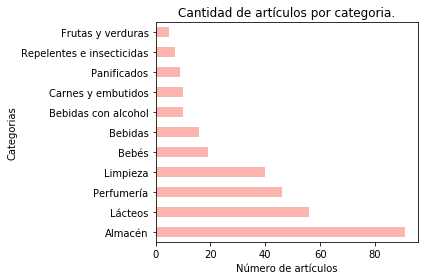

In [77]:
plot_chart()

In [78]:
df.loc[df['item_category']=='Carnes y embutidos'].sort_values(by=['item_price_AMBA'],ascending=False) # Detalle de 'Carnes y embutidos' 

,item_name,item_category,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
245,Salchichas Fun 190 gr Patyviena x 6 un,Carnes y embutidos,"$ 75,00","$ 77,63","$ 79,13","$ 80,25","$ 81,00"
53,Espinazo novillo Supermercado x 1 kg,Carnes y embutidos,"$ 65,00","$ 67,28","$ 68,58","$ 71,50","$ 71,50"
246,Salchichas Junior 190 gr Swift x 6 un,Carnes y embutidos,"$ 65,00","$ 67,28","$ 68,58","$ 69,55","$ 70,20"
240,Roast beef novillo Supermercado x 1 kg,Carnes y embutidos,"$ 229,00","$ 237,02","$ 241,60","$ 251,90","$ 251,90"
262,Tapa de Asado novillo Supermercado x 1 kg,Carnes y embutidos,"$ 229,00","$ 237,02","$ 241,60","$ 251,90","$ 251,90"
57,Fiambre de cerdo comercial Supermercado x 1 kg,Carnes y embutidos,"$ 219,00","$ 226,67","$ 231,05","$ 234,33","$ 234,33"
199,Picada común Supermercado x 1 kg,Carnes y embutidos,"$ 169,00","$ 174,92","$ 178,30","$ 185,90","$ 185,90"
152,Medallón de carne Express 276 gr Paty x 4 un,Carnes y embutidos,"$ 150,00","$ 155,25","$ 158,25","$ 160,50","$ 162,00"
151,Medallones de carne 276 gr Swift x 4 un,Carnes y embutidos,"$ 115,00","$ 119,03","$ 121,33","$ 123,05","$ 124,20"
200,Pollo Entero aditivado con menudos fresco o co...,Carnes y embutidos,"$ 108,00","$ 111,78","$ 113,94","$ 115,56","$ 116,64"


In [79]:
def fix_price(column):
    ''' La columnas que guardan el precio  de los artículos son strings, no números enteros/flotantes,
    que son los que precisamos.
    Esto se resuelve eliminando el signo pesos, la coma y casteando ese resultado a float.
    '''
    df[column] = df[column].map(lambda x: x.replace('$ ',''))
    df[column] = df[column].map(lambda x: x.replace(',','.'))
    df[column] = df[column].map(lambda x: float(x))


In [80]:
fix_price('item_price_AMBA')
fix_price('item_price_restoPBA')
fix_price('item_price_CCL')
fix_price('item_price_neaNOA')
fix_price('item_price_Patagonia')

In [81]:
df.sort_values(by='item_price_AMBA',ascending=False)

,item_name,item_category,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
182,Pañales descartables Supersec Talle G Pampers ...,Bebés,650.0,650.0,650.0,650.00,650.0
186,Pañales descartables Supersec Talle XXG Pamper...,Bebés,650.0,650.0,650.0,650.00,650.0
185,Pañales descartables Supersec Talle XG Pampers...,Bebés,650.0,650.0,650.0,650.00,650.0
183,Pañales descartables Supersec Talle M Pampers ...,Bebés,650.0,650.0,650.0,650.00,650.0
221,Protector solar Sun Protect & Hydrate 30 FPS N...,Perfumería,470.0,470.0,470.0,470.00,470.0
...,...,...,...,...,...,...,...
128,Leche larga vida Parcialmente descremada Diáfa...,Lácteos,0.0,0.0,49.0,0.00,0.0
126,Leche larga vida Entera Diáfana x 1 lt,Lácteos,0.0,0.0,49.0,0.00,0.0
120,Leche en polvo Entera 26% Mg Inst. Fortif. C/V...,Lácteos,0.0,0.0,195.0,197.77,0.0
119,Leche en polvo Descremada 0% Mg Manfrey x 400 gr,Lácteos,0.0,0.0,195.0,197.77,0.0


In [82]:
df.groupby('item_category').mean()

,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
item_category,,,,,
Almacén,72.791209,74.330989,75.210000,75.868132,76.307253
Bebidas,52.531250,54.370625,50.857500,51.491875,51.913750
Bebidas con alcohol,65.900000,67.264000,68.042000,68.623000,69.012000
Bebés,325.157895,325.157895,325.157895,325.157895,325.157895
Carnes y embutidos,142.400000,147.388000,150.236000,154.444000,154.957000
Frutas y verduras,41.400000,42.850000,43.678000,44.298000,44.712000
Limpieza,97.057500,97.855250,98.311000,98.652750,98.880500
Lácteos,80.897321,83.293393,94.272143,91.215714,83.757679
Panificados,77.666667,78.426667,78.860000,79.183333,79.400000


Al calcular el promedio por categoría vemos que los precios no son los mismos a lo largo y ancho del país.
De cualquier manera, las diferencias -en la mayoría de los casos- son pequeñas. 

In [83]:
df.loc[df['item_price_AMBA'] == 0] 

,item_name,item_category,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
119,Leche en polvo Descremada 0% Mg Manfrey x 400 gr,Lácteos,0.0,0.0,195.0,197.77,0.0
120,Leche en polvo Entera 26% Mg Inst. Fortif. C/V...,Lácteos,0.0,0.0,195.0,197.77,0.0
126,Leche larga vida Entera Diáfana x 1 lt,Lácteos,0.0,0.0,49.0,0.00,0.0
128,Leche larga vida Parcialmente descremada Diáfa...,Lácteos,0.0,0.0,49.0,0.00,0.0
209,Postre Lácteo Dulce de Leche Manfrey x 120 gr,Lácteos,0.0,0.0,27.0,27.00,0.0
210,Postre Lácteo Vainilla Manfrey x 120 gr,Lácteos,0.0,0.0,27.0,27.00,0.0


In [84]:
df.loc[df['item_price_AMBA'] == 0]

,item_name,item_category,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
119,Leche en polvo Descremada 0% Mg Manfrey x 400 gr,Lácteos,0.0,0.0,195.0,197.77,0.0
120,Leche en polvo Entera 26% Mg Inst. Fortif. C/V...,Lácteos,0.0,0.0,195.0,197.77,0.0
126,Leche larga vida Entera Diáfana x 1 lt,Lácteos,0.0,0.0,49.0,0.00,0.0
128,Leche larga vida Parcialmente descremada Diáfa...,Lácteos,0.0,0.0,49.0,0.00,0.0
209,Postre Lácteo Dulce de Leche Manfrey x 120 gr,Lácteos,0.0,0.0,27.0,27.00,0.0
210,Postre Lácteo Vainilla Manfrey x 120 gr,Lácteos,0.0,0.0,27.0,27.00,0.0


In [85]:
df.loc[df['item_price_restoPBA'] == 0]

,item_name,item_category,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
119,Leche en polvo Descremada 0% Mg Manfrey x 400 gr,Lácteos,0.0,0.0,195.0,197.77,0.0
120,Leche en polvo Entera 26% Mg Inst. Fortif. C/V...,Lácteos,0.0,0.0,195.0,197.77,0.0
126,Leche larga vida Entera Diáfana x 1 lt,Lácteos,0.0,0.0,49.0,0.00,0.0
128,Leche larga vida Parcialmente descremada Diáfa...,Lácteos,0.0,0.0,49.0,0.00,0.0
209,Postre Lácteo Dulce de Leche Manfrey x 120 gr,Lácteos,0.0,0.0,27.0,27.00,0.0
210,Postre Lácteo Vainilla Manfrey x 120 gr,Lácteos,0.0,0.0,27.0,27.00,0.0


In [86]:
df.loc[df['item_price_CCL'] == 0]

,item_name,item_category,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
76,"Gaseosa Cola original Coca Cola x 1,25 lt",Bebidas,82.0,84.87,0.0,0.0,0.0


In [87]:
df.loc[df['item_price_neaNOA'] == 0]

,item_name,item_category,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
76,"Gaseosa Cola original Coca Cola x 1,25 lt",Bebidas,82.00,84.87,0.00,0.0,0.0
123,Leche Fresca Entera tenor graso 3% Armonía x 1 lt,Lácteos,40.25,41.66,42.46,0.0,0.0
124,Leche Fresca Parcialmente Descremada tenor gra...,Lácteos,40.25,41.66,42.46,0.0,0.0
125,Leche Fresca Parcialmente Descremada tenor gra...,Lácteos,40.25,41.66,42.46,0.0,0.0
126,Leche larga vida Entera Diáfana x 1 lt,Lácteos,0.00,0.00,49.00,0.0,0.0
128,Leche larga vida Parcialmente descremada Diáfa...,Lácteos,0.00,0.00,49.00,0.0,0.0


In [88]:
df.loc[df['item_price_Patagonia'] == 0]

,item_name,item_category,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
76,"Gaseosa Cola original Coca Cola x 1,25 lt",Bebidas,82.00,84.87,0.00,0.00,0.0
119,Leche en polvo Descremada 0% Mg Manfrey x 400 gr,Lácteos,0.00,0.00,195.00,197.77,0.0
120,Leche en polvo Entera 26% Mg Inst. Fortif. C/V...,Lácteos,0.00,0.00,195.00,197.77,0.0
123,Leche Fresca Entera tenor graso 3% Armonía x 1 lt,Lácteos,40.25,41.66,42.46,0.00,0.0
124,Leche Fresca Parcialmente Descremada tenor gra...,Lácteos,40.25,41.66,42.46,0.00,0.0
125,Leche Fresca Parcialmente Descremada tenor gra...,Lácteos,40.25,41.66,42.46,0.00,0.0
126,Leche larga vida Entera Diáfana x 1 lt,Lácteos,0.00,0.00,49.00,0.00,0.0
128,Leche larga vida Parcialmente descremada Diáfa...,Lácteos,0.00,0.00,49.00,0.00,0.0
209,Postre Lácteo Dulce de Leche Manfrey x 120 gr,Lácteos,0.00,0.00,27.00,27.00,0.0
210,Postre Lácteo Vainilla Manfrey x 120 gr,Lácteos,0.00,0.00,27.00,27.00,0.0


In [89]:
def zero_to_null(column):    
    df[column] = np.where(df[column] == 0, np.nan,df[column])

In [90]:
zero_to_null('item_price_AMBA')
zero_to_null('item_price_restoPBA')
zero_to_null('item_price_CCL')
zero_to_null('item_price_neaNOA')
zero_to_null('item_price_Patagonia')

In [91]:
df.groupby('item_category').mean()

,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
item_category,,,,,
Almacén,72.791209,74.330989,75.210000,75.868132,76.307253
Bebidas,52.531250,54.370625,54.248000,54.924667,55.374667
Bebidas con alcohol,65.900000,67.264000,68.042000,68.623000,69.012000
Bebés,325.157895,325.157895,325.157895,325.157895,325.157895
Carnes y embutidos,142.400000,147.388000,150.236000,154.444000,154.957000
Frutas y verduras,41.400000,42.850000,43.678000,44.298000,44.712000
Limpieza,97.057500,97.855250,98.311000,98.652750,98.880500
Lácteos,90.605000,93.288600,94.272143,100.158431,99.796383
Panificados,77.666667,78.426667,78.860000,79.183333,79.400000


In [92]:
df.groupby('item_category').mean()

,item_price_AMBA,item_price_restoPBA,item_price_CCL,item_price_neaNOA,item_price_Patagonia
item_category,,,,,
Almacén,72.791209,74.330989,75.210000,75.868132,76.307253
Bebidas,52.531250,54.370625,54.248000,54.924667,55.374667
Bebidas con alcohol,65.900000,67.264000,68.042000,68.623000,69.012000
Bebés,325.157895,325.157895,325.157895,325.157895,325.157895
Carnes y embutidos,142.400000,147.388000,150.236000,154.444000,154.957000
Frutas y verduras,41.400000,42.850000,43.678000,44.298000,44.712000
Limpieza,97.057500,97.855250,98.311000,98.652750,98.880500
Lácteos,90.605000,93.288600,94.272143,100.158431,99.796383
Panificados,77.666667,78.426667,78.860000,79.183333,79.400000


No sorprende encontrar que la zona más económica del país sea el AMBA y la más cara la Patagonia. La diferencia es menor al 5%.
Aclaración: esto surgue de los promedios, está muy lejos de ser una canasta básica o cosas de estilo.

La diferencia más significativa está entre los lácteos.  Hay más de un 10% de diferencia entre el AMBA, y el NEA y NOA, la zona más cara de este rubro. Luego, con una diferencia del 8%, entre el AMBA y la Patagonia, Carnes y embutidos.